In [47]:
# -*- coding: utf-8 -*-
"""Untitled1.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1JhwojSeQ9E2JmEpsmsoB-17wST8NDy-3
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def get_main_table(code):
    url = f"https://lsgkerala.gov.in/en/lbelection/electdmemberdet/2020/{code}"
    print(f"📥 Scraping main table: {url}")

    try:
        tables = pd.read_html(url)
        for df in tables:
            df.columns = [col.strip() for col in df.columns]
            if any("Elected Members" in col for col in df.columns):
                df["Code"] = code
                return df
    except Exception as e:
        print(f"❌ Failed to read table: {e}")
        return None

def get_member_details(code, member_id):
    url = f"https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/{code}/{member_id}"
    print(f"🔍 Scraping: {url}")
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "html.parser")
    table = soup.find("table")

    if not table:
        print("⚠️ No detail table found.")
        return {}

    data = {}
    for tr in table.find_all("tr"):
        tds = tr.find_all("td")
        if len(tds) == 2:
            key = tds[0].get_text(strip=True).replace(":", "")
            value = tds[1].get_text(strip=True)
            data[key] = value
    return data

# --- MAIN SCRIPT ---

code = 163
start_id = 2020016300101
step = 100

main_df = get_main_table(code)

if main_df is not None:
    all_combined = []

    for i, row in main_df.iterrows():
        member_id = start_id + i * step
        detail_data = get_member_details(code, member_id)

        combined = row.to_dict()
        combined.update(detail_data)
        combined["Detail_URL"] = f"https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/{code}/{member_id}"
        all_combined.append(combined)

        time.sleep(1)  # polite scraping

    final_df = pd.DataFrame(all_combined)

    # Optional: reorder columns
    preferred_order = [
        'Ward No.', 'Ward Name', 'Elected Members', 'Role', 'Party', 'Reservation',
        'Name of Member', 'Address', 'Phone', 'Mobile', 'Age', 'Female/Male',
        'Marital Status', 'Educational Qualification', 'Occupation', 'Detail_URL'
    ]
    final_df = final_df[[col for col in preferred_order if col in final_df.columns]]

    # Save to file
    final_df.to_csv("elected_members_full_details.csv", index=False)
    print("✅ Data saved to 'elected_members_full_details.csv'")
else:
    print("❌ Main table could not be scraped.")

from google.colab import files
files.download('elected_members_full_details.csv')

import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

# Load existing CSV that has 'Detail_URL'
df = pd.read_csv("elected_members_full_details.csv")

# Columns to extract from the individual detail pages
detail_fields = [
    "Ward No.", "Ward Name", "Name of Member", "Address", "Phone", "Mobile",
    "Age", "Female/Male", "Marital Status", "Educational Qualification", "Occupation"
]

# Function to extract details from the member's individual page
def extract_member_details(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        data = {}
        rows = soup.select("table tbody tr")

        for row in rows:
            cells = row.find_all("td")
            if len(cells) == 2:
                key = cells[0].text.strip()
                value = cells[1].text.strip()
                if key in detail_fields:
                    data[key] = value
        return data
    except Exception as e:
        print(f"Error at URL: {url}\n{e}")
        return {}

# Loop through all Detail_URLs and scrape the info
detailed_data = []

for url in tqdm(df["Detail_URL"], desc="Scraping Details"):
    member_info = extract_member_details(url)
    detailed_data.append(member_info)

# Convert scraped details to DataFrame
details_df = pd.DataFrame(detailed_data)

# Combine original and new data
combined_df = pd.concat([df.reset_index(drop=True), details_df], axis=1)

# Save the final enhanced CSV
combined_df.to_csv("elected_members_detailed.csv", index=False)
print("✅ Detailed data saved to 'elected_members_detailed.csv'")

from google.colab import files
files.download('elected_members_detailed.csv')




📥 Scraping main table: https://lsgkerala.gov.in/en/lbelection/electdmemberdet/2020/163
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300101
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300201
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300301
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300401
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300501
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300601
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300701
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300801
🔍 Scraping: https://lsgkerala.gov.in/en/lbelection/electdmemberpersondet/2020/163/2020016300901
🔍 Scraping: https://lsgkerala.gov.in/en/lbelectio

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scraping Details: 100%|██████████| 27/27 [00:48<00:00,  1.81s/it]

✅ Detailed data saved to 'elected_members_detailed.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
df=pd.read_csv("/content/elected_members_detailed.csv")
df

,Ward No.,Ward Name,Elected Members,Role,Party,Reservation,Detail_URL,Ward No..1,Ward Name.1,Name of Member,Address,Phone,Mobile,Age,Female/Male,Marital Status,Educational Qualification,Occupation
0,1,AZHIYOOR,NISHA PUTHAMBURAYIL,Member,LJD,Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,1.0,AZHIYOOR,NISHA PUTHAMBURAYIL,"PUTHAMBURAYIL, ORKKATTERI, ORKKATTERI-673501",9.846565e+09,8.848567e+09,45.0,Female,NaN,SSLC,NILL
1,2,EDACHERI,KOOTATHAMKANDIYIL SURESH MASTER,Member,CPI(M),General,https://lsgkerala.gov.in/en/lbelection/electdm...,2.0,EDACHERI,KOOTATHAMKANDIYIL SURESH MASTER,"KOOTATHAMKANDIYIL, AROOR, AROOR-673507",4.962580e+09,9.447639e+09,58.0,Male,Married,BA BED,RTED.TEACHER
2,3,NADAPURAM,C.V.M NAJMA,Member,IUML,Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,3.0,NADAPURAM,C.V.M NAJMA,"CHETTYAVEETIL, VANIMEL, VANIMEL-673506",NaN,9.495478e+09,47.0,Female,Married,BSC ZOOLOGY,NILL
3,4,MOKERI,P SURENDRAN,Member,CPI(M),General,https://lsgkerala.gov.in/en/lbelection/electdm...,4.0,MOKERI,P SURENDRAN,"PARAPPUMMAL, KAVILUMPARA, KAVILUMPARA-673513",NaN,9.446163e+09,60.0,Male,NaN,PRE-DEGREE,NIL
4,5,KUTTIADY,C M YASODA,Member,CPI(M),Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,5.0,KUTTIADY,C M YASODA,"PALLIYATH, VELOM, KURICHAKAM-673508",NaN,9.946221e+09,49.0,Female,Married,9TH,NIL
5,6,PERAMBRA,SHEEJA SASI,President,CPI(M),Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,6.0,PERAMBRA,SHEEJA SASI,"POTHANAMALAYIL, CHAKKITTAPARA, PERUVANNAMUZHI-...",9.645104e+09,9.072982e+09,45.0,Female,Married,SSLC,NILL
6,7,KATTIPPARA,RAMSEENA K K,Member,IUML,Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,7.0,KATTIPPARA,RAMSEENA K K,"KOTTAYOTTU KUNIYIL, NARIKUNI, NARIKUNI-673585",9.539494e+09,7.034904e+09,26.0,Female,Married,BSC.PHYSICS,FREELANCE WRITER
7,8,BALUSSERY,P P PREMA,Member,CPI(M),Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,8.0,BALUSSERY,P P PREMA,"PADINJHARE PUTHIYARAMBATH, BALUSSERI, KOKKALLU...",NaN,9.656632e+09,48.0,Female,Married,SSLC,NILL
8,9,ENGAPUZHA,AMBICA MANGALATH,Member,INC,SC Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,9.0,ENGAPUZHA,AMBICA MANGALATH,"MANGALATH, KUPPAYAKODE, KUPPAYAKODE-673580",7.510637e+09,9.495613e+09,53.0,Female,Married,PRE-DIGREE,NILL
9,10,KODENCHERY,BOSE JACOB,Member,INC,General,https://lsgkerala.gov.in/en/lbelection/electdm...,10.0,KODENCHERY,BOSE JACOB,"PURAYIDATHIL, THIRUVAMBADY, THIRUVAMBADY-673603",NaN,9.946933e+09,46.0,Male,Married,DIGREE,AGRICULTURE


In [49]:
df.drop(columns=['Ward No..1', 'Ward Name.1'], inplace=True)

In [50]:
df

,Ward No.,Ward Name,Elected Members,Role,Party,Reservation,Detail_URL,Name of Member,Address,Phone,Mobile,Age,Female/Male,Marital Status,Educational Qualification,Occupation
0,1,AZHIYOOR,NISHA PUTHAMBURAYIL,Member,LJD,Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,NISHA PUTHAMBURAYIL,"PUTHAMBURAYIL, ORKKATTERI, ORKKATTERI-673501",9.846565e+09,8.848567e+09,45.0,Female,NaN,SSLC,NILL
1,2,EDACHERI,KOOTATHAMKANDIYIL SURESH MASTER,Member,CPI(M),General,https://lsgkerala.gov.in/en/lbelection/electdm...,KOOTATHAMKANDIYIL SURESH MASTER,"KOOTATHAMKANDIYIL, AROOR, AROOR-673507",4.962580e+09,9.447639e+09,58.0,Male,Married,BA BED,RTED.TEACHER
2,3,NADAPURAM,C.V.M NAJMA,Member,IUML,Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,C.V.M NAJMA,"CHETTYAVEETIL, VANIMEL, VANIMEL-673506",NaN,9.495478e+09,47.0,Female,Married,BSC ZOOLOGY,NILL
3,4,MOKERI,P SURENDRAN,Member,CPI(M),General,https://lsgkerala.gov.in/en/lbelection/electdm...,P SURENDRAN,"PARAPPUMMAL, KAVILUMPARA, KAVILUMPARA-673513",NaN,9.446163e+09,60.0,Male,NaN,PRE-DEGREE,NIL
4,5,KUTTIADY,C M YASODA,Member,CPI(M),Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,C M YASODA,"PALLIYATH, VELOM, KURICHAKAM-673508",NaN,9.946221e+09,49.0,Female,Married,9TH,NIL
5,6,PERAMBRA,SHEEJA SASI,President,CPI(M),Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,SHEEJA SASI,"POTHANAMALAYIL, CHAKKITTAPARA, PERUVANNAMUZHI-...",9.645104e+09,9.072982e+09,45.0,Female,Married,SSLC,NILL
6,7,KATTIPPARA,RAMSEENA K K,Member,IUML,Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,RAMSEENA K K,"KOTTAYOTTU KUNIYIL, NARIKUNI, NARIKUNI-673585",9.539494e+09,7.034904e+09,26.0,Female,Married,BSC.PHYSICS,FREELANCE WRITER
7,8,BALUSSERY,P P PREMA,Member,CPI(M),Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,P P PREMA,"PADINJHARE PUTHIYARAMBATH, BALUSSERI, KOKKALLU...",NaN,9.656632e+09,48.0,Female,Married,SSLC,NILL
8,9,ENGAPUZHA,AMBICA MANGALATH,Member,INC,SC Woman,https://lsgkerala.gov.in/en/lbelection/electdm...,AMBICA MANGALATH,"MANGALATH, KUPPAYAKODE, KUPPAYAKODE-673580",7.510637e+09,9.495613e+09,53.0,Female,Married,PRE-DIGREE,NILL
9,10,KODENCHERY,BOSE JACOB,Member,INC,General,https://lsgkerala.gov.in/en/lbelection/electdm...,BOSE JACOB,"PURAYIDATHIL, THIRUVAMBADY, THIRUVAMBADY-673603",NaN,9.946933e+09,46.0,Male,Married,DIGREE,AGRICULTURE


In [51]:
print(df['Name of Member'].value_counts())

Name of Member
NISHA PUTHAMBURAYIL                1
KOOTATHAMKANDIYIL SURESH MASTER    1
C.V.M NAJMA                        1
P SURENDRAN                        1
C M YASODA                         1
SHEEJA SASI                        1
RAMSEENA K K                       1
P P PREMA                          1
AMBICA MANGALATH                   1
BOSE JACOB                         1
V P JAMEELA                        1
NASAR ESTATEMUKKU                  1
KAMBALATH SUDHA                    1
RAJEEV PERUMANPURA                 1
ADV.P GAVAS                        1
M DHANEESHLAL                      1
E SASEENDRAN                       1
P T M SHARAFUNNISA TEACHER         1
I P RAJESH                         1
SINDHU SURESH                      1
MUKKAM MUHAMMED                    1
M P SIVANANDAN                     1
C M BABU                           1
V P DULKHIFIL                      1
K V REENA                          1
N M VIMALA                         1
Name: count, dtype: int

In [52]:
members_summary = df[['Name of Member', 'Party', 'Age']].copy()
members_summary.rename(columns={'Name of Member': 'Name'}, inplace=True)

In [53]:
def detect_religion(name):
    name = str(name).strip().lower()

    muslim_keywords = [
        'c.v.m najma', 'ramseena k k', 'v p jameela', 'nasar estatemukku',
        'p t m sharafunnisa teacher', 'mukkam muhammed', 'c m babu', 'v p dulkhifil'
    ]

    hindu_keywords = [
        'nisha puthamburayil', 'kootathamkandiyil suresh master', 'p surendran',
        'sheeja sasi', 'p p prema', 'ambica mangalath', 'kambalath sudha',
        'rajeev perumanpura', 'adv.p gavas', 'm dhaneeshlal', 'e saseendran',
        'i p rajesh', 'sindhu suresh', 'm p sivanandan', 'k v reena', 'n m vimala'
    ]

    christian_keywords = ['c m yasoda', 'bose jacob']

    if name in [kw.lower().strip() for kw in muslim_keywords]:
        return 'Muslim'
    elif name in [kw.lower().strip() for kw in hindu_keywords]:
        return 'Hindu'
    elif name in [kw.lower().strip() for kw in christian_keywords]:
        return 'Christian'
    else:
        return 'Unknown'

In [55]:
members_summary['Religion'] = members_summary['Name'].apply(detect_religion)

In [57]:
print(members_summary['Religion'].value_counts())

Religion
Hindu        16
Muslim        8
Christian     2
Unknown       1
Name: count, dtype: int64


In [58]:
final_list = members_summary[['Name', 'Party', 'Age', 'Religion']]
final_list.to_csv("detailed_members_with_religion.csv", index=False)

print(final_list.head())

                              Name   Party   Age   Religion
0              NISHA PUTHAMBURAYIL     LJD  45.0      Hindu
1  KOOTATHAMKANDIYIL SURESH MASTER  CPI(M)  58.0      Hindu
2                      C.V.M NAJMA    IUML  47.0     Muslim
3                      P SURENDRAN  CPI(M)  60.0      Hindu
4                       C M YASODA  CPI(M)  49.0  Christian


In [60]:
print(final_list.tail())

              Name   Party   Age Religion
22  M P SIVANANDAN     LJD  57.0    Hindu
23        C M BABU  CPI(M)  54.0   Muslim
24   V P DULKHIFIL     INC  33.0   Muslim
25       K V REENA  CPI(M)  48.0    Hindu
26      N M VIMALA     CPI  56.0    Hindu


## Party-wise Distribution

In [61]:
party_counts = members_summary['Party'].value_counts()
print("Party-wise Distribution:\n", party_counts)

Party-wise Distribution:
 Party
CPI(M)    13
INC        5
IUML       4
LJD        2
CPI        2
NCP        1
Name: count, dtype: int64


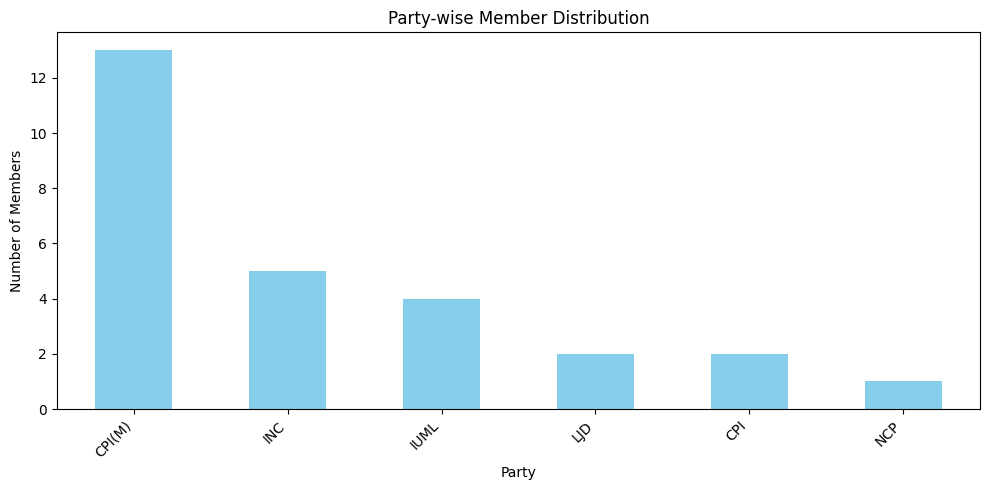

In [63]:
# Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
party_counts.plot(kind='bar', color='skyblue')
plt.title('Party-wise Member Distribution')
plt.xlabel('Party')
plt.ylabel('Number of Members')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Religion-wise Distribution

In [65]:
religion_counts = members_summary['Religion'].value_counts()
print("\nReligion-wise Distribution:\n", religion_counts)


Religion-wise Distribution:
 Religion
Hindu        16
Muslim        8
Christian     2
Unknown       1
Name: count, dtype: int64


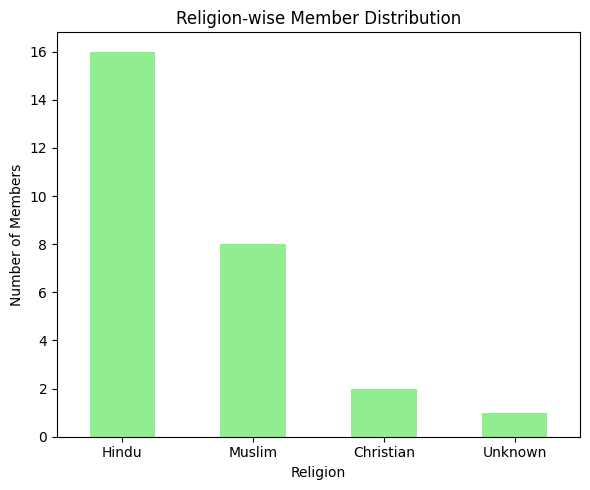

In [66]:
# Plot
plt.figure(figsize=(6,5))
religion_counts.plot(kind='bar', color='lightgreen')
plt.title('Religion-wise Member Distribution')
plt.xlabel('Religion')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Party vs Religion Pivot Table

In [67]:
party_religion = pd.crosstab(members_summary['Party'], members_summary['Religion'])
print("\nParty vs Religion Table:\n", party_religion)


Party vs Religion Table:
 Religion  Christian  Hindu  Muslim  Unknown
Party                                      
CPI               0      2       0        0
CPI(M)            1      9       2        1
INC               1      3       1        0
IUML              0      0       4        0
LJD               0      2       0        0
NCP               0      0       1        0


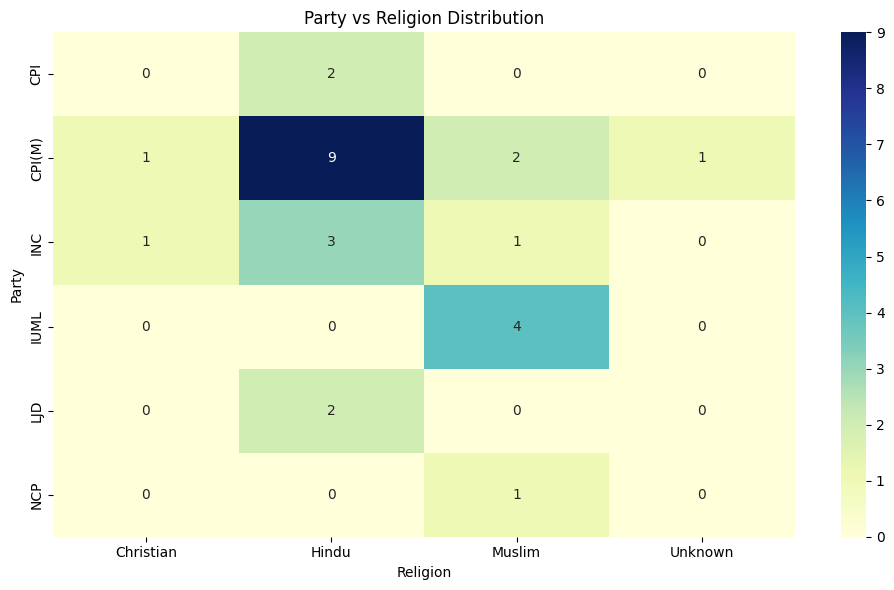

In [68]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(party_religion, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Party vs Religion Distribution')
plt.xlabel('Religion')
plt.ylabel('Party')
plt.tight_layout()
plt.show()